# Estimando os Parâmetros Elétricos do Modelo de Um Diodo via Jaya

Para tornar a convergência mais rápida, diminui o maxFes = 1000. Aumente se necessário! Roda em Octave ou Matlab.

Para rodar online, use: https://mybinder.org/v2/gh/Calysto/octave_kernel/master?urlpath=/lab/tree/octave_kernel.ipynb

In [4]:
%%octave

function [Iph, I0, n, Rs, Rp, RMSE] = Jaya_PV_Original(Vmed, Imed, Ns, T, lim_inf, lim_sup, RUNS, pop, maxFes)
%%
% Descricao:
%   Computa o algoritimo gentico Jaya de um diodo
%
% Entradas:
%   Vmed - vetor de tensao medida [V]
%   Imed - vetor de corrente medida [A]
%   Ns   - numero de celulas
%   T    - temperatura do mdulo  [C]
%   lim_inf - vetor dos limites inferiores dos parametros a
%      serem estimados. Formato: [Iph_min, I0_min, n_min, Rs_min, Rp_min];
%   lim_sup - vetor dos limites superiores dos parametros a
%      serem estimados. Formato: [Iph_max, I0_max, n_max, Rs_max, Rp_max];
%   RUNS - quantidade de rodadas
%   pop - tamanho da populacao de cada rodada
%   maxFes - quantidade maxima de avaliacao da funcao objetivo
%
% Saidas:
%   Iph - corrente fotogerada
%   I0 - corrente de saturacao reversa
%   n - indice de idealidade do diodo
%   Rs - resistencia serie
%   Rp - resistencia paralelo
%   RMSE - erro quadradico medio

%% Constantes
k = 1.3806503e-23;    % Boltzmann [J/K]
q = 1.60217646e-19;   % Electron charge [C]
T = T + 273.15;       % Tempeture [K]
Vt = Ns*k*T/q;        
%%
% Default values for RUNS, pop and maxFes.
if isnan(RUNS)
    RUNS = 10;  
end
if isnan(pop)
    pop = 20;
end
if isnan(maxFes)
    maxFes = 1000; % 50000 para melhores resultados
end 
%% 
maxGen = floor(maxFes/pop); % quantidade maxima de geracoes
%var = [Iph, I0, n, Rs, Rp];
mini = lim_inf;       % limite inferior
maxi = lim_sup;       % limite superior
[~,var] = size(mini); % var  a quantidade de variaves.
runs = 1;             % contador de rodadas    
while(runs <= RUNS)
    %% inicializacao da populacao
    x = zeros(pop, var);
    for i = 1:var
        x(:,i) = mini(i)+(maxi(i)-mini(i))*rand(pop,1);
    end
    %%
    gen = 1; % contador de geracoes
    f = myobj(x, Vt, Imed, Vmed); % fitness inicial
    while(gen <= maxGen)
        xnew = updatepopulation(x, f);      % Cria nova populacao
        xnew = trimr(mini,maxi,xnew);       % Manter variaveis dentro dos limites
        fnew = myobj(xnew, Vt, Imed, Vmed); % Avalia fitness da nova polulacao

        for i = 1:pop
            if(fnew(i) < f(i))  % Os novos individuos possuem fitness melhor?
                x(i,:) = xnew(i,:);
                f(i) = fnew(i);
            end
        end
        fopt(gen) = min(f); % Vetor que armazena o melhor fitness de cada gerao
        gen = gen+1;
    end
    [fmin, id] = min(f);
    xmelhores(runs,:) =  [x(id,:), fmin]; % Vetor que armazena o melhor de cada rodada
%% Plotar graficos a cada fim de gerao
%    disp('Parametros obtidos no ciclo i')
%    Iph = x(id,1)
%    I0 = x(id,2)
%    n = x(id,3)
%    Rs = x(id,4)
%    Rp = x(id,5)    
%    figure(runs)
%    plot(Vmed, Imed,'o');
%    hold on    
%    fmodelo = @(V,I) (I - Iph*ones(size(I)) + I0*(exp((V+I*Rs)/(n*Vt))-1) + (V+I*Rs)/Rp);
    % fimplicit(fmodelo,[0 Vmed(end) 0 Imed(1)]);
%    ezplot(fmodelo,[0 20 0 7.8]); % Mudar
   %temp = input('digite algo');
%    xlim([0 Vmed(end)+1])
%    ylim([0, Imed(1) + 0.2])
%%    
%     [val,ind] = min(fopt);   % 
%     Fes(runs) = pop*ind;     % number of function evaluations
%     best(runs) = val;
    runs = runs+1;
end
% valores medios dos parametros
%disp('Parametros medios')    
%Iph_med = mean(xmelhores(:,1))
%I0_med = mean(xmelhores(:,2))
%n_med = mean(xmelhores(:,3))
%Rs_med = mean(xmelhores(:,4))
%Rp_med = mean(xmelhores(:,5))
%f_med = mean(xmelhores(:,6))

%% Melhor resultado
[temp, id] = min(xmelhores(:,6));
Iph = xmelhores(id,1);
I0 = xmelhores(id,2);
n = xmelhores(id,3);
Rs = xmelhores(id,4);
Rp = xmelhores(id,5);
RMSE = xmelhores(id,6);
%disp('n Melhor resultado')
%disp('[Iph, I0, n, Rs, Rp, fitness]');
%disp(xmelhores(id,:))
%fprintf('n Iph(A) = %f',xmelhores(id,1));
%fprintf('n I0(uA) = %f',xmelhores(id,2)*10^6);
%fprintf('n n = %f',xmelhores(id,3));
%fprintf('n Rs(ohms) = %f',xmelhores(id,4));
%fprintf('n Rph(ohms) = %f',xmelhores(id,5));
%fprintf('n fmin = %f',xmelhores(id,6));



%% Mostra resultados em termos de desvio padrao, media, minimo e max fitness
%bbest = min(best);   
%mbest = mean(best);  
%wbest = max(best);   
%stdbest = std(best);
%mFes = mean(Fes);
%fprintf('nn best = %f',bbest);
%fprintf('n mean = %f',mbest);
%fprintf('n worst = %f',wbest);
%fprintf('n std. dev. = %f',stdbest);
%fprintf('n mean Fes = %f',mFes);
%fprintf('n');
end

%%
function [z] = trimr(mini, maxi, x)
[~,var] = size(x);
for i = 1:var
    x(x(:,i)<mini(i), i) = mini(i);
    x(x(:,i)>maxi(i), i) = maxi(i);
end
z = x;
end
%% 
function [xnew] = updatepopulation(x, f)
[pop, var] = size(x);
[~, id_best] = min(f);
[~, id_worst] = max(f);
best = x(id_best,:);
worst = x(id_worst,:);
xnew = zeros(pop,var); % pre alocacao de memoria
% for i = 1:pop
%     for j = 1:var
%         r = rand(1,2);
%         xnew(i,j) = x(i,j) + r(1)*(best(j)-abs(x(i,j))) - r(2)*(worst(j)-abs(x(i,j)));
%     end
% end
%% TESTAR ISSO AQUI!!!!!
R1 = rand(pop,var);
R2 = rand(pop,var);
xnew = x + R1.*(best - abs(x)) - R2.*(worst - abs(x));

end
%%

Define-se a função objetivo, no caso o erro quadrático médio (RMSE) da corrente:

In [5]:
%%octave

function [f] = myobj(x, Vt, Imed, Vmed)
[pop,~] = size(x);
RMSE = zeros(1,pop); % pre-alocacao de memoria
for i = 1:pop
    Iph = x(i,1);
    I0 = x(i,2);
    n = x(i,3);
    Rs = x(i,4);
    Rp = x(i,5);
    RMSE(i) = sqrt(sum((Imed - Iph*ones(size(Imed)) + I0*(exp((Vmed+Imed*Rs)/(n*Vt))-1) + (Vmed+Imed*Rs)/Rp).^2)/length(Imed));
end
f = RMSE;
end

## Tarefa 1

Observe que para o cálculo do RMSE se utiliza o valor da corrente medida (Imed). Em si isso gera um pequeno erro, uma vez que o valor medido se difere do estimado. Estamos estudando uma forma de contornar isso. Dê e implemente uma sugestão.

# Chamando a função

 Parametros obtidos:
 Iph(A) = 1.028178
 I0(uA) = 5.201811
 n = 1.395238
 Rs(ohms) = 1.161067
 Rp(ohms) = 1949.018447
 RMSE = 0.002743 
error: scalar cannot be indexed with .


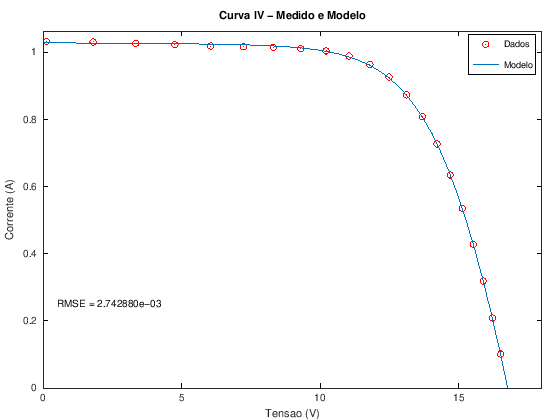

In [7]:
%%octave
warning('off')
%% Dados de entrada
%A = load('Dados_Photowatt-PWP 201.txt');
% Vetor de tensoes medidas  [V]
Vmed = [0.1248;1.80930;3.35110;4.76220;6.05380;7.23640;8.31890;9.30970;10.2163;11.0449;11.8018;12.4929;13.1231;13.6983;14.2221;14.6995;15.1346;15.5311;15.8929;16.2229;16.5241;16.7987;17.0499;17.2793;17.4885];  
% Vetor de correntes medidas [A]
Imed = [1.03150;1.03000;1.02600;1.02200;1.01800;1.01550;1.01400;1.01000;1.00350;0.988000;0.963000;0.925500;0.872500;0.807500;0.726500;0.634500;0.534500;0.427500;0.318500;0.208500;0.101000;-0.00800000;-0.111000;-0.209000;-0.303000];
Tc = 45; %[C]
T = Tc + 273.15; %[K]
Ns = 36;

%% Criterios de ajuste
% var = [Iph, I0, n, Rs, Rp];
limite_inf = [0, 0, 1, 0, 0];            % limite inferior
limite_sup = [max(Imed)*1.1, 50*10^-6, 2, 2, 2000];  % limite superior

RUNS = 30;
pop = 20;
maxFes = 10000; % 50000 para bons resultados
graphic = false;
[Iph, I0, n, Rs, Rp, RMSE] =  Jaya_PV_Original(Vmed, Imed, Ns, Tc, limite_inf, limite_sup, RUNS, pop, maxFes);
fprintf(' Parametros obtidos:')
fprintf('\n Iph(A) = %f',Iph);
fprintf('\n I0(uA) = %f',I0*10^6);
fprintf('\n n = %f',n);
fprintf('\n Rs(ohms) = %f',Rs);
fprintf('\n Rp(ohms) = %f',Rp);
fprintf('\n RMSE = %f \n',RMSE);


plot(Vmed, Imed,'ro');
hold on

% plotagem do modelo obtido
k = 1.3806503e-23; q = 1.60217646e-19;   %
Vt = Ns*k*T/q;

modelo = @(V,I) (I - Iph + I0*(exp((V+I*Rs)/(n*Vt))-1) + (V+I*Rs)/Rp);
ezplot(modelo,[0 max(Vmed)*1.03 0 max(Imed)*1.03]);
title(['Curva IV - Medido e Modelo'])
xlim([0, max(Vmed)*1.03])
ylim([0, max(Imed)*1.03])
xlabel('Tensao (V)')
ylabel('Corrente (A)')
leng1 = legend('Dados', 'Modelo');
leng1.Location = 'best';
rmsetext = ['RMSE = ', num2str(RMSE,'%e')]; 
text(0.5, 0.25, rmsetext);